In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C://Users//user//Desktop//911.csv")

In [3]:
df.info()
df.head()
df['zip'].value_counts().head(5)
df['twp'].value_counts().head(5)

df['title'].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


131

In [4]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [6]:
df['reason'].head(2)
df['reason'].value_counts()
 

EMS        144362
Traffic    101889
Fire        42989
Name: reason, dtype: int64

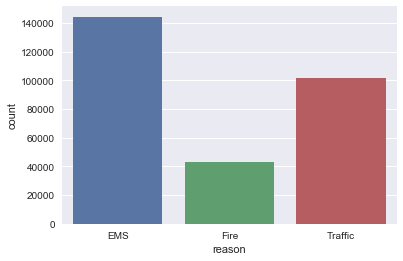

In [9]:
sns.countplot(x = 'reason', data = df)

In [10]:
type(df['timeStamp'].iloc[0])

df['timeStamp'] = pd.to_datetime(df['timeStamp'])


df['timeStamp'].iloc[0]


df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)



df['Hour'].head(5)


0    17
1    17
2    14
3    16
4    16
Name: Hour, dtype: int64

In [11]:
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)



df.head(3)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


In [12]:
dmap = {0:'mon', 1:'tue',2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}


df['Day of Week'] = df['Day of Week'].map(dmap)



df['Day of Week'].nunique()


7

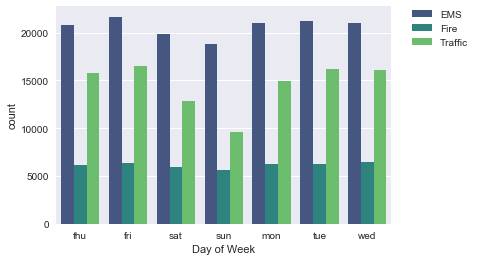

In [14]:
sns.countplot(data = df, x = 'Day of Week', hue = 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)

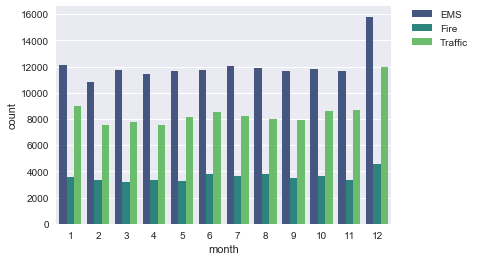

In [15]:
sns.countplot(data = df, x = 'month', hue = 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)

In [16]:
df['date'] = df['timeStamp'].apply(lambda t:t.date())
df.head(3)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,thu,2015-12-10


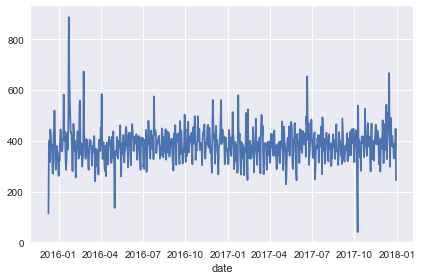

In [17]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

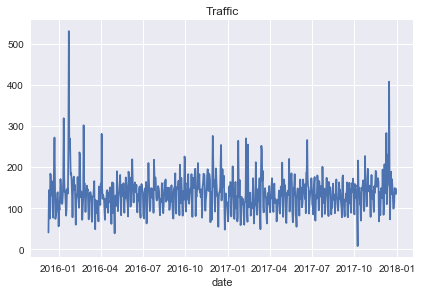

In [18]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

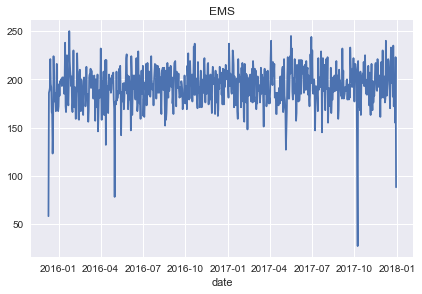

In [19]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

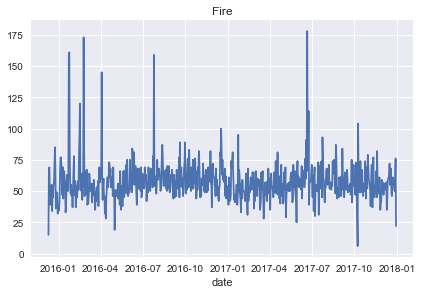

In [20]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

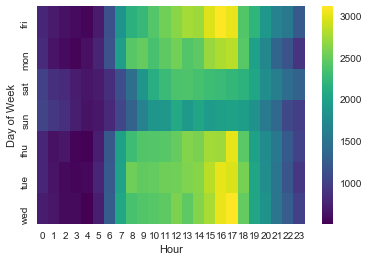

In [21]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['reason'].unstack()




sns.heatmap(dayHour, cmap = 'viridis')


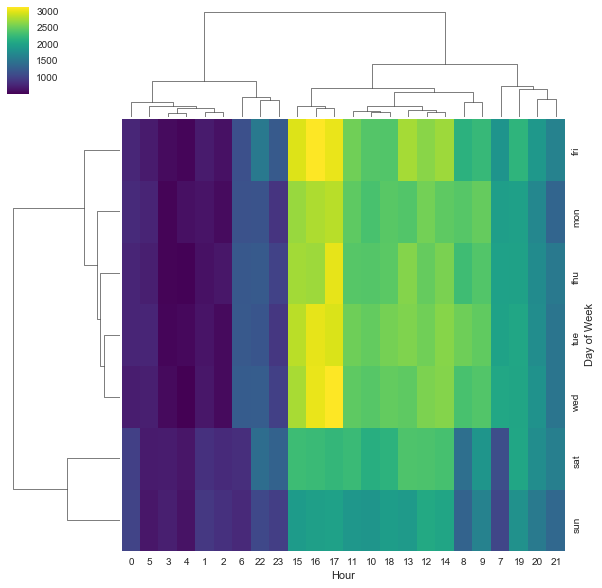

In [23]:
sns.clustermap(dayHour, cmap = 'viridis')dayMonth = df.groupby(by = ['Day of Week', 'month']).count()['reason'].unstack()



dayMonth



sns.heatmap(dayMonth, cmap = 'viridis')


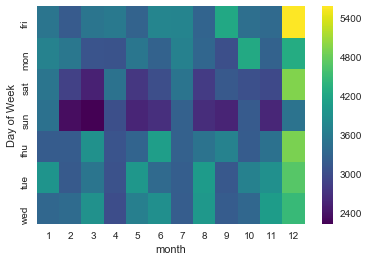

In [24]:
dayMonth = df.groupby(by = ['Day of Week', 'month']).count()['reason'].unstack()



dayMonth



sns.heatmap(dayMonth, cmap = 'viridis')


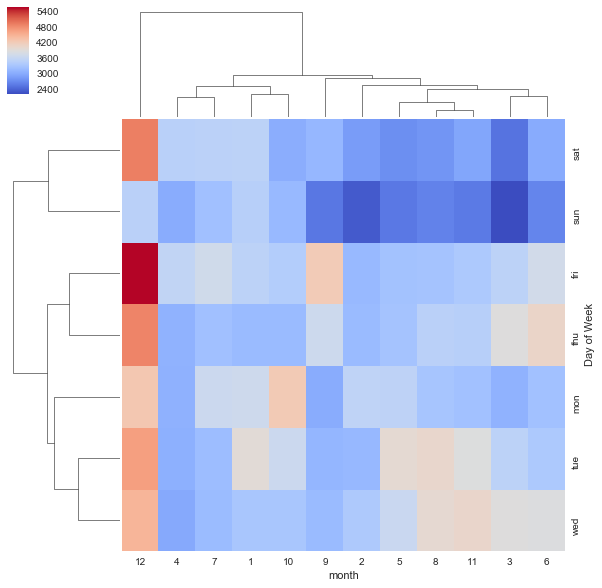

In [25]:
sns.clustermap(dayMonth, cmap = 'coolwarm')
